In [190]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

## Подготовка данных

In [191]:
data_base_path = "SOCR-HeightWeight.csv"

In [192]:
df = pd.read_csv(data_base_path)[:100]
df.drop("Index", axis=1, inplace=True)

display(df)

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
95,70.55703,131.8001
96,66.28644,120.0285
97,63.42577,123.0972
98,66.76711,128.1432


Возьмем 7 значений наименее зашемленных:

In [193]:
df['bin'] = pd.qcut(df["Weight(Pounds)"], q=10, duplicates='drop')
display(df)


,Height(Inches),Weight(Pounds),bin
0,65.78331,112.9925,"(112.93, 120.245]"
1,71.51521,136.4873,"(132.832, 136.505]"
2,69.39874,153.0269,"(142.519, 155.899]"
3,68.21660,142.3354,"(140.44, 142.519]"
4,67.78781,144.2971,"(142.519, 155.899]"
...,...,...,...
95,70.55703,131.8001,"(129.408, 132.832]"
96,66.28644,120.0285,"(112.93, 120.245]"
97,63.42577,123.0972,"(120.245, 123.433]"
98,66.76711,128.1432,"(127.825, 129.408]"


In [194]:
df_smooth = df.groupby('bin').agg({
    "Weight(Pounds)": "mean",
    "Height(Inches)": "mean"
}).reset_index(drop=True)

display(smooth_df)

/var/folders/8k/67hlyrt568x_jpdg397vh5sw0000gp/T/ipykernel_7675/1971564205.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_smooth = df.groupby('bin').agg({


,Weight(Pounds),Height(Inches)
0,109.020781,66.923125
1,120.147800,67.112321
2,125.727671,67.435869
3,129.666171,67.576294
4,134.355843,69.363469
5,139.773343,69.636004
6,146.013893,68.968226


In [195]:
X_smooth = df_smooth["Height(Inches)"]
Y_smooth = df_smooth["Weight(Pounds)"]

# mean_x = np.mean(X)
# mean_y = np.mean(Y)

# numerator = np.sum((X - mean_x) * (Y - mean_y))
# denominator = np.sum((X - mean_x) ** 2)

# b1 = numerator / denominator
# b0 = mean_y - (b1 * mean_x)



In [196]:
# x_min = np.min(X)
# x_max = np.max(X)
# x_line = np.linspace(x_min, x_max, 100) # 100 точек для гладкой линии
# y_line = b0 + b1 * x_line

Гладкая функция:

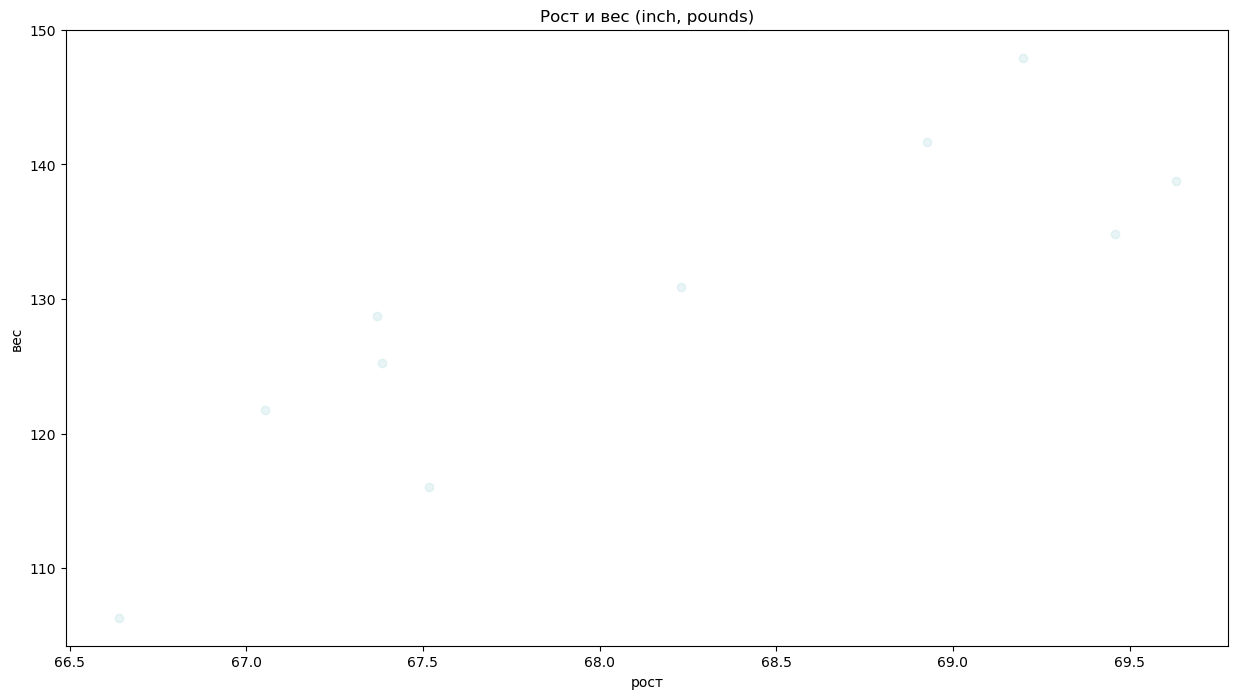

In [197]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x=X_smooth, y=Y_smooth, alpha=0.4, color="#c6e4e7")

ax.set_xlabel("рост")
ax.set_ylabel("вес")
ax.set_title("Рост и вес (inch, pounds)")
plt.show()

Нахождение Wo* и W1*:

In [198]:
def get_coef(x, y):
    size = len(x)
    A = np.empty((2, 2))
    A[[0], [0]] = sum((x[i])**2 for i in range(0,size))
    A[[0], [1]] = sum(x)
    A[[1], [0]] = sum(x)
    A[[1], [1]] = size
    
    A = np.linalg.inv(A)    # обратная матрица
 
    C = np.empty((2, 1))
    C[0] = sum((x[i]*y[i]) for i in range(0,size))
    C[1] = sum((y[i]) for i in range(0,size))
    
    # умножаем матрицу на вектор
    ww = np.dot(A, C)
    return ww[1], ww[0]

w0, w1 = get_coef(X_smooth, Y_smooth)
print(f"Wo = {w0_1}     W1 = {w1_1}")

Wo = [-543.36565717]     W1 = [9.87033087]


y_approx = W0 + W1*Xi

In [199]:
y_approx_smooth = w0 + w1*X_smooth
print(y_approx_smooth)

0    114.385671
1    123.066163
2    118.477466
3    121.744861
4    121.600715
5    130.089979
6    142.206027
7    143.908541
8    136.976588
9    139.635161
Name: Height(Inches), dtype: float64


## МНК без шума

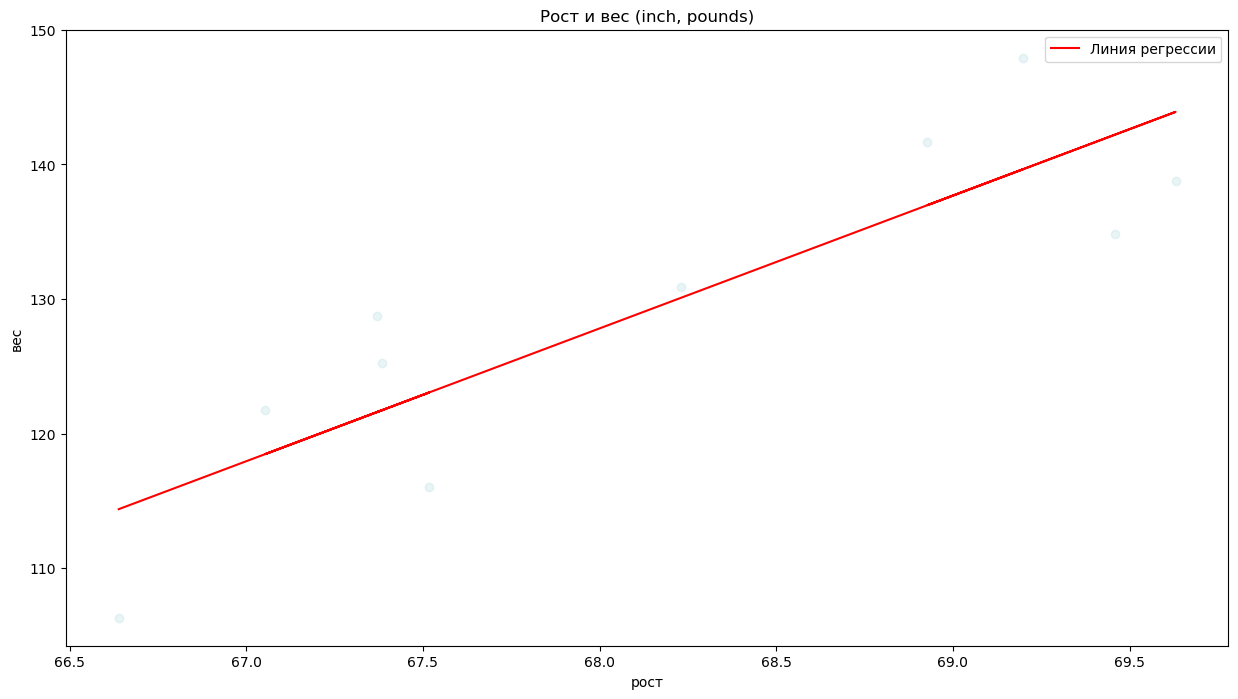

In [200]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x=X_smooth, y=Y_smooth, alpha=0.4, color="#c6e4e7")

ax.plot(X_smooth, y_approx_smooth, color='red', label=f'Линия регрессии')

ax.set_xlabel("рост")
ax.set_ylabel("вес")
ax.set_title("Рост и вес (inch, pounds)")
ax.legend()
plt.show()